In [4]:
from sklearn import datasets as skds
from sklearn import model_selection as skms
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
num_outputs = 2
num_inputs = 2
X, y = skds.make_classification(n_samples=200,
                                n_features=num_inputs,
                                n_informative=2,
                                n_redundant=0,
                                n_repeated=0,
                                n_classes=num_outputs,
                                n_clusters_per_class=1)

In [4]:
X[:1]

array([[-1.17035313, -0.97569934]])

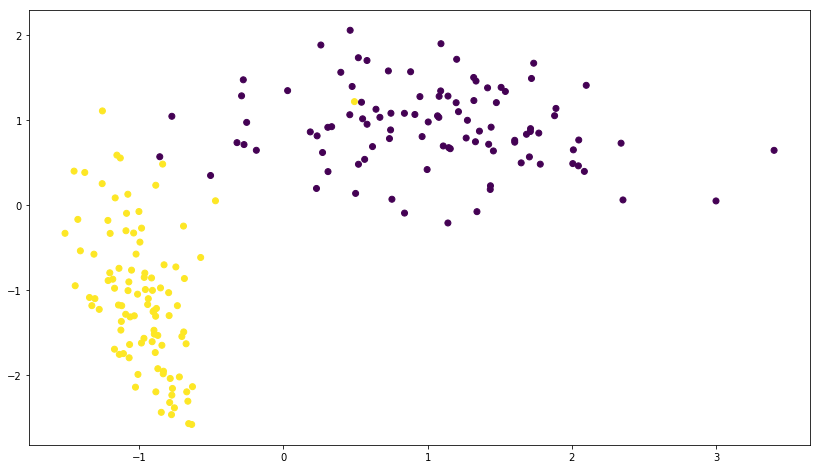

In [5]:
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [6]:
# one-hot encoded
print(y[0:5])
y=np.eye(np.max(y)+1)[y]
print(y[0:5])

[1 0 1 0 1]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [7]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=.4, random_state=42)

In [8]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]
learning_rate = .001

In [9]:
# input images
x = tf.placeholder(dtype=tf.float32,shape=[None,num_inputs],name='x')
# output features
y = tf.placeholder(dtype=tf.float32,shape=[None,num_outputs],name='y')

In [10]:
# weight
W = tf.Variable(tf.zeros([num_inputs,num_outputs]),name='W')
# bias
b = tf.Variable(tf.zeros([num_outputs],name='b'))

In [11]:
model = tf.nn.sigmoid(tf.matmul(x,W) + b)

In [12]:
loss = tf.reduce_mean(-tf.reduce_sum(
    (y * tf.log(model)) + ((1 - y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [13]:
X_test.shape

(80, 2)

In [16]:
y_test.shape

(80, 2)

epoch 0000  accuracy=0.97500002


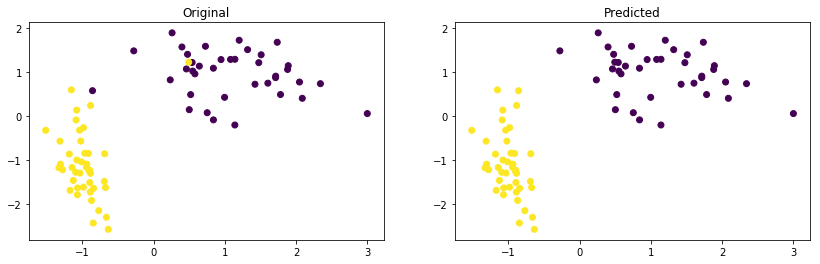

In [18]:
num_epochs = 1
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        y_pred = tfs.run(tf.argmax(model, 1), feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y: y_test})

        preds_check = tf.equal(y_pred, y_orig)
        accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
        accuracy_score = tfs.run(accuracy_op)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))

        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_orig)
        plt.title('Original')
        plt.subplot(1, 2, 2)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
        plt.title('Predicted')
        plt.show()

In [1]:

from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import utils


/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
num_outputs = 10 # 0-9 digits
num_inputs = 784 # total pixels
learning_rate = 0.001
num_epochs = 1
batch_size = 100
num_batches = 100
mnist_size = 60000

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the two dimensional 28 x 28 pixels
#   sized images into a single vector of 784 pixels
x_train = x_train.reshape(60000, num_inputs)
x_test = x_test.reshape(10000, num_inputs)

# convert the input values to float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# normalize the values of image vectors to fit under 1
x_train /= 255
x_test /= 255

# convert output data into one hot encoded format
y_train = utils.to_categorical(y_train, num_outputs)
y_test = utils.to_categorical(y_test, num_outputs)

In [7]:
n = 2
x_train[n*batch_size:(n+1)*batch_size].shape

(100, 784)

In [8]:
n = 1
y_train[n*batch_size:(n+1)*batch_size].shape

(100, 10)

In [9]:
# input images
X = tf.placeholder(dtype=tf.float32,shape=[None,num_inputs],name='X')
y = tf.placeholder(dtype=tf.float32,shape=[None,num_outputs],name='y')

W = tf.Variable(tf.zeros(shape=[num_inputs,num_outputs]),name='W')
b = tf.Variable(tf.zeros(shape=[num_outputs]),name='b')
model = tf.nn.softmax(tf.matmul(X,W) + b)

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model),axis=1) )
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [18]:
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        for batch in range(num_batches):
            # getting chunks of data
            batch_x = x_train[batch*batch_size%mnist_size:(batch+1)*batch_size%mnist_size]
            batch_y = y_train[batch*batch_size%mnist_size:(batch+1)*batch_size%mnist_size]
            tfs.run(optimizer, feed_dict={X: batch_x, y: batch_y})
        predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracy_function = tf.reduce_mean(
            tf.cast(predictions_check, tf.float32))
        feed_dict = {X: x_test, y: y_test}
        accuracy_score = tfs.run(accuracy_function, feed_dict)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))
        

NameError: name 'accuracy_epochs' is not defined

In [39]:
def mnist_batch_func(batch,batch_size):
    batch_x = x_train[batch*batch_size%mnist_size:(batch+1)*batch_size%mnist_size]
    batch_y = y_train[batch*batch_size%mnist_size:(batch+1)*batch_size%mnist_size]
    return [batch_x, batch_y]

In [49]:
# creating multiple itterations
def tensorflow_classification(num_epochs, num_batches, batch_size,batch_func,optimizer,test_x,test_y):
    accuracy_epochs = np.empty(shape=[num_epochs],dtype=np.float32)
    with tf.Session() as tfs:
        tf.global_variables_initializer().run()
        for epoch in range(num_epochs):
            for batch in range(num_batches):
                # getting chunks of data
                batch_x ,batch_y = mnist_batch_func(batch,batch_size)
                feed_dict={X: batch_x, y: batch_y}
                tfs.run(optimizer, feed_dict=feed_dict)
            predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
            accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))
            feed_dict = {X: x_test, y: y_test}
            accuracy_score = tfs.run(accuracy_function, feed_dict)
            accuracy_epochs[epoch] = accuracy_score
            print("epoch {0:04d} accuracy={1:.8f}".format(
            epoch, accuracy_score))
    plt.figure(figsize=(14, 8))
    plt.axis([0, num_epochs, np.min(
    accuracy_epochs), np.max(accuracy_epochs)])
    plt.plot(accuracy_epochs, label='Accuracy Score')
    plt.title('Accuracy over Iterations')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
    



epoch 0000 accuracy=0.69630003
epoch 0001 accuracy=0.71469998
epoch 0002 accuracy=0.72600001
epoch 0003 accuracy=0.73549998
epoch 0004 accuracy=0.74269998
epoch 0005 accuracy=0.74879998
epoch 0006 accuracy=0.75590003
epoch 0007 accuracy=0.76080000
epoch 0008 accuracy=0.76630002
epoch 0009 accuracy=0.77109998
epoch 0010 accuracy=0.77469999
epoch 0011 accuracy=0.78009999
epoch 0012 accuracy=0.78380001
epoch 0013 accuracy=0.78750002
epoch 0014 accuracy=0.79070002
epoch 0015 accuracy=0.79519999
epoch 0016 accuracy=0.79869998
epoch 0017 accuracy=0.80150002
epoch 0018 accuracy=0.80360001
epoch 0019 accuracy=0.80610001
epoch 0020 accuracy=0.80809999
epoch 0021 accuracy=0.81029999
epoch 0022 accuracy=0.81230003
epoch 0023 accuracy=0.81389999
epoch 0024 accuracy=0.81599998
epoch 0025 accuracy=0.81720001
epoch 0026 accuracy=0.81870002
epoch 0027 accuracy=0.82040000
epoch 0028 accuracy=0.82220000
epoch 0029 accuracy=0.82389998
epoch 0030 accuracy=0.82590002
epoch 0031 accuracy=0.82760000
epoch 00

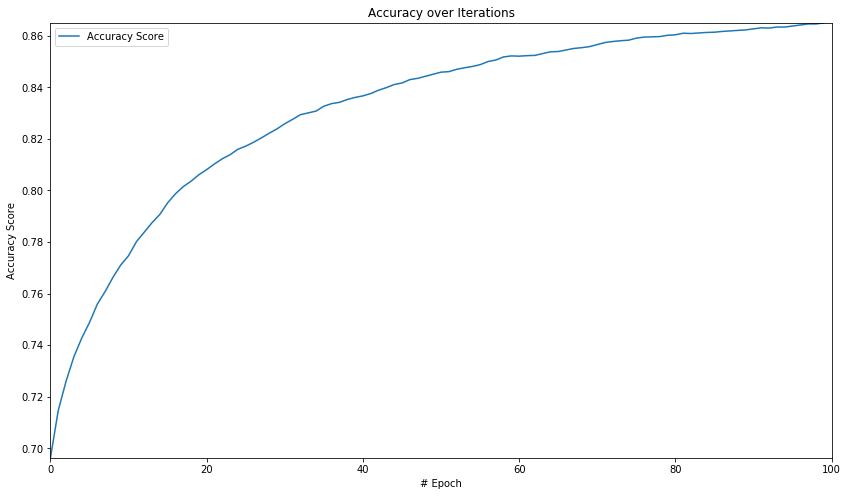

In [52]:
num_epochs=100
tensorflow_classification(num_epochs=num_epochs,
num_batches=num_batches,
batch_size=batch_size,
batch_func=mnist_batch_func,
optimizer=optimizer,
test_x=x_test,test_y=y_test)